In [1]:
import pandas as pd
import pandas_datareader as pdr
key="8a9323ec1fa44a2224b6ebce349e39ffe1794f94"

In [2]:
df = pdr.get_data_tiingo('MSFT', api_key=key)

C:\Users\DELL\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('MSFT.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('MSFT.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-07-17 00:00:00+00:00,105.95,106.50,104.32,104.61,25901726,100.176595,100.696625,98.635417,98.909614,25901726,0.0,1.0
1,MSFT,2018-07-18 00:00:00+00:00,105.12,106.05,104.72,105.94,29493927,99.391823,100.271146,99.013620,100.167140,29493927,0.0,1.0
2,MSFT,2018-07-19 00:00:00+00:00,104.40,105.31,103.89,104.93,40171646,98.711058,99.571470,98.228848,99.212177,40171646,0.0,1.0
3,MSFT,2018-07-20 00:00:00+00:00,106.27,108.20,106.08,108.08,56038827,100.479158,102.303989,100.299511,102.190528,56038827,0.0,1.0
4,MSFT,2018-07-23 00:00:00+00:00,107.97,108.14,106.13,106.30,29706955,102.086522,102.247258,100.346787,100.507523,29706955,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2023-07-10 00:00:00+00:00,331.83,335.230,327.59,334.60,32791449,331.83,335.230,327.59,334.60,32791449,0.0,1.0
1253,MSFT,2023-07-11 00:00:00+00:00,332.47,332.860,327.00,331.06,26698218,332.47,332.860,327.00,331.06,26698218,0.0,1.0
1254,MSFT,2023-07-12 00:00:00+00:00,337.20,341.652,335.67,336.60,29995262,337.20,341.652,335.67,336.60,29995262,0.0,1.0
1255,MSFT,2023-07-13 00:00:00+00:00,342.66,343.740,339.02,339.56,20567159,342.66,343.740,339.02,339.56,20567159,0.0,1.0
1256,MSFT,2023-07-14 00:00:00+00:00,345.24,351.430,344.31,347.59,28352729,345.24,351.430,344.31,347.59,28352729,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       105.95
1       105.12
2       104.40
3       106.27
4       107.97
         ...  
1252    331.83
1253    332.47
1254    337.20
1255    342.66
1256    345.24
Name: close, Length: 1257, dtype: float64

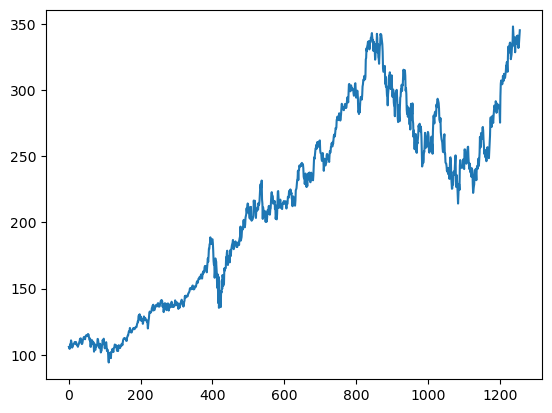

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       105.95
1       105.12
2       104.40
3       106.27
4       107.97
         ...  
1252    331.83
1253    332.47
1254    337.20
1255    342.66
1256    345.24
Name: close, Length: 1257, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.04654093]
 [0.04327283]
 [0.04043785]
 ...
 [0.95708155]
 [0.97858015]
 [0.98873883]]


In [15]:

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(817, 440)

In [17]:
train_data

array([[0.04654093],
       [0.04327283],
       [0.04043785],
       [0.04780092],
       [0.05449463],
       [0.05327401],
       [0.0657558 ],
       [0.06099146],
       [0.05335276],
       [0.0442572 ],
       [0.0470528 ],
       [0.0478403 ],
       [0.05291964],
       [0.05477025],
       [0.05512462],
       [0.05807773],
       [0.06047958],
       [0.06118833],
       [0.05855022],
       [0.05543962],
       [0.06075521],
       [0.05327401],
       [0.05319526],
       [0.05295901],
       [0.05016341],
       [0.04665905],
       [0.05091152],
       [0.05288026],
       [0.05618774],
       [0.06091271],
       [0.06351144],
       [0.07044139],
       [0.07016577],
       [0.07166201],
       [0.06922077],
       [0.05654211],
       [0.05752648],
       [0.05543962],
       [0.06004646],
       [0.06737016],
       [0.06922077],
       [0.07394574],
       [0.07575698],
       [0.07091389],
       [0.07512698],
       [0.0691814 ],
       [0.07654447],
       [0.079

In [18]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step =  100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 226ms/step - loss: 0.0501 - val_loss: 0.0346
Epoch 2/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0104 - val_loss: 0.0072
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 4/100
12/12 [==============================] - 2s 136ms/step - loss: 0.0013 - val_loss: 0.0033
Epoch 5/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0011 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 2s 140ms/step - loss: 9.6979e-04 - val_loss: 0.0032
Epoch 7/100
12/12 [==============================] - 2s 161ms/step - loss: 9.3211e-04 - val_loss: 0.0030
Epoch 8/100
12/12 [==============================] - 2s 199ms/step - loss: 9.2187e-04 - val_loss: 0.0030
Epoch 9/100
12/12 [==============================] - 2s 196ms/step - loss: 9.0528e-04 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 183ms/step - loss:

12/12 [==============================] - 3s 211ms/step - loss: 4.5206e-04 - val_loss: 0.0013
Epoch 79/100
12/12 [==============================] - 3s 219ms/step - loss: 3.9627e-04 - val_loss: 0.0014
Epoch 80/100
12/12 [==============================] - 3s 218ms/step - loss: 4.3697e-04 - val_loss: 0.0015
Epoch 81/100
12/12 [==============================] - 3s 219ms/step - loss: 3.8544e-04 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 2s 198ms/step - loss: 4.7763e-04 - val_loss: 0.0014
Epoch 83/100
12/12 [==============================] - 3s 216ms/step - loss: 3.7306e-04 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 2s 195ms/step - loss: 3.8066e-04 - val_loss: 0.0014
Epoch 85/100
12/12 [==============================] - 2s 200ms/step - loss: 3.7950e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 3s 226ms/step - loss: 4.0521e-04 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 3s 21

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.13.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 33ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

193.1449774848378

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

270.6210150846145

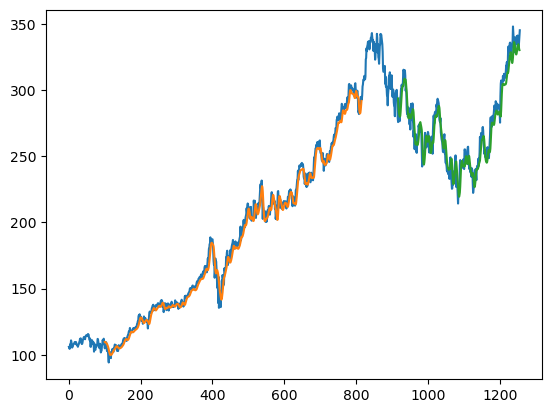

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

440

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.6196794897035083,
 0.6325156514548962,
 0.6106626766940977,
 0.614363901248179,
 0.6114501712800724,
 0.5990471315509707,
 0.6181045005315589,
 0.6345631373784304,
 0.6407843446076307,
 0.6300744182383746,
 0.6283025554199315,
 0.622868842776706,
 0.6081820687482773,
 0.6291687994645037,
 0.6562192384927354,
 0.6745284876166475,
 0.7168956963420876,
 0.7296137339055793,
 0.7012639288104894,
 0.7073670118517934,
 0.7015001771862819,
 0.7226444068197031,
 0.7341024530456353,
 0.7176044414694649,
 0.7130763476001103,
 0.7338662046698428,
 0.7478048588415955,
 0.7645391187935582,
 0.7603260227585935,
 0.7601291491120998,
 0.7489467259912586,
 0.7775327794621412,
 0.7688309642871205,
 0.7430011418671496,
 0.7455998740008662,
 0.7706028271055634,
 0.7560341772650312,
 0.766507855258495,
 0.7648147418986493,
 0.7651297397330392,
 0.7559160530771352,
 0.7545379375516792,
 0.7388274205614835,
 0.7138244674567862,
 0.7923770524077647,
 0.8296255463243689,
 0.8391936055439617,
 0.8324999015631

In [39]:

from numpy import array

lst_output=[]
n_steps=100

i=0
while(i<25):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.63251565 0.61066268 0.6143639  0.61145017 0.59904713 0.6181045
 0.63456314 0.64078434 0.63007442 0.62830256 0.62286884 0.60818207
 0.6291688  0.65621924 0.67452849 0.7168957  0.72961373 0.70126393
 0.70736701 0.70150018 0.72264441 0.73410245 0.71760444 0.71307635
 0.7338662  0.74780486 0.76453912 0.76032602 0.76012915 0.74894673
 0.77753278 0.76883096 0.74300114 0.74559987 0.77060283 0.75603418
 0.76650786 0.76481474 0.76512974 0.75591605 0.75453794 0.73882742
 0.71382447 0.79237705 0.82962555 0.83919361 0.8324999  0.83190928
 0.82793243 0.83190928 0.85254164 0.84466669 0.83816986 0.85907784
 0.8504154  0.84592668 0.84785605 0.85683348 0.86573217 0.88352955
 0.88282081 0.89400323 0.87069339 0.86514155 0.91266685 0.94011104
 0.93349608 0.92239241 0.93889042 0.94999409 0.95212033 0.94322164
 0.90266567 0.91006812 0.91609245 0.93601606 0.9456235  0.95763279
 1.         0.97728078 0.9604284  0.94274914 0.9669646  0.94849785
 0.92321928 0.94672599 0.95176596 0.94861598 0.9702

7 day output [[0.9006356]]
8 day input [0.63007442 0.62830256 0.62286884 0.60818207 0.6291688  0.65621924
 0.67452849 0.7168957  0.72961373 0.70126393 0.70736701 0.70150018
 0.72264441 0.73410245 0.71760444 0.71307635 0.7338662  0.74780486
 0.76453912 0.76032602 0.76012915 0.74894673 0.77753278 0.76883096
 0.74300114 0.74559987 0.77060283 0.75603418 0.76650786 0.76481474
 0.76512974 0.75591605 0.75453794 0.73882742 0.71382447 0.79237705
 0.82962555 0.83919361 0.8324999  0.83190928 0.82793243 0.83190928
 0.85254164 0.84466669 0.83816986 0.85907784 0.8504154  0.84592668
 0.84785605 0.85683348 0.86573217 0.88352955 0.88282081 0.89400323
 0.87069339 0.86514155 0.91266685 0.94011104 0.93349608 0.92239241
 0.93889042 0.94999409 0.95212033 0.94322164 0.90266567 0.91006812
 0.91609245 0.93601606 0.9456235  0.95763279 1.         0.97728078
 0.9604284  0.94274914 0.9669646  0.94849785 0.92321928 0.94672599
 0.95176596 0.94861598 0.9702327  0.96019215 0.96082214 0.97310706
 0.95716029 0.93593732 

18 day output [[0.87059414]]
19 day input [0.70150018 0.72264441 0.73410245 0.71760444 0.71307635 0.7338662
 0.74780486 0.76453912 0.76032602 0.76012915 0.74894673 0.77753278
 0.76883096 0.74300114 0.74559987 0.77060283 0.75603418 0.76650786
 0.76481474 0.76512974 0.75591605 0.75453794 0.73882742 0.71382447
 0.79237705 0.82962555 0.83919361 0.8324999  0.83190928 0.82793243
 0.83190928 0.85254164 0.84466669 0.83816986 0.85907784 0.8504154
 0.84592668 0.84785605 0.85683348 0.86573217 0.88352955 0.88282081
 0.89400323 0.87069339 0.86514155 0.91266685 0.94011104 0.93349608
 0.92239241 0.93889042 0.94999409 0.95212033 0.94322164 0.90266567
 0.91006812 0.91609245 0.93601606 0.9456235  0.95763279 1.
 0.97728078 0.9604284  0.94274914 0.9669646  0.94849785 0.92321928
 0.94672599 0.95176596 0.94861598 0.9702327  0.96019215 0.96082214
 0.97310706 0.95716029 0.93593732 0.9384573  0.95708155 0.97858015
 0.98873883 0.9432624  0.9432624  0.94450021 0.93871158 0.93182063
 0.9248085  0.9180764  0.91177

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,126)

In [41]:
import matplotlib.pyplot as plt

In [42]:
len(df1)


1257

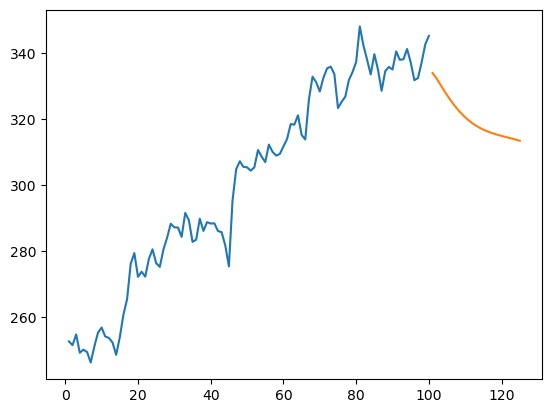

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

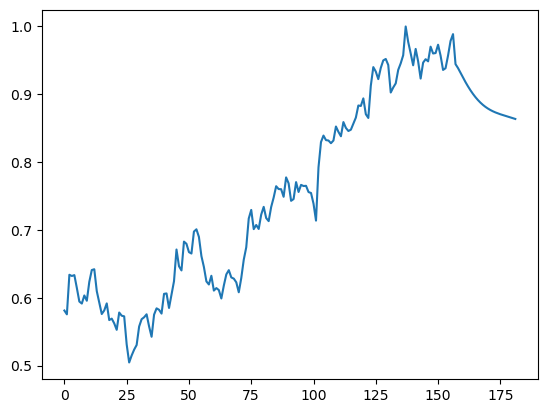

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])